In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
import tensorflow as tf
from tensorflow import keras
from skimage.filters import gaussian
from skimage import io, img_as_float

In [2]:
print(os.listdir("C:/Users/CHINMAY/Desktop/signaturedataset"))

['train', 'validation']


In [3]:
size=128

#Capture images and labels into arrays
#Start by creating empty lists
train_images=[]
train_labels=[]

for directory_path in glob.glob("C:/Users/CHINMAY/Desktop/signaturedataset/train/*"):
    label=directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        #print(img_path)
        img=cv2.imread(img_path,0) #Reading colored images
        img=cv2.resize(img,(size,size)) #resize the images
        
        
        #img =cv2.GaussianBlur(img,(5,5),0)
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = np.float32(img)
        #img = cv2.cornerHarris(img,2,3,0.04)

        
        low_sigma = cv2.GaussianBlur(img,(3,3),0)
        high_sigma = cv2.GaussianBlur(img,(5,5),0)
        dog = low_sigma - high_sigma
        #dog = np.uint8(dog)
        
        
        train_images.append(dog)
        train_labels.append(label)

        
train_images=np.array(train_images)
train_labels=np.array(train_labels)

#print(train_images)
#print(train_labels)





In [42]:
test_images=[]
test_labels=[]

for directory_path in glob.glob("C:/Users/CHINMAY/Desktop/signaturedataset/validation/*"):
    label=directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        #print(img_path)
        img=cv2.imread(img_path,0) #Reading colored images
        img=cv2.resize(img,(size,size)) #resize the images
        
        
        
        #img = cv2.GaussianBlur(img,(5,5),0)
        #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #img = np.float32(img)
        #img = cv2.cornerHarris(img,2,3,0.04)
        
        
        low_sigma = cv2.GaussianBlur(img,(3,3),0)
        high_sigma = cv2.GaussianBlur(img,(5,5),0)
        dog = low_sigma - high_sigma
        #dog = np.uint8(dog)
        
        
        test_images.append(dog)
        test_labels.append(label)

        
test_images=np.array(test_images)
test_labels=np.array(test_labels)



forged
genuine


In [5]:
#Encode labels from text(Folder names) to integers

from sklearn import preprocessing

le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)




In [6]:
#Split data into test and train datasets(already split but assigning to meaningful convention)
#If you only have one dataset then split here

x_train,y_train,x_test,y_test= train_images,train_labels_encoded,test_images,test_labels_encoded



In [7]:
# FEATURE EXTRACTOR FUNCTION
#input shape is (n,x,y,c) - number of images,x,y,and channels

def feature_extractor(dataset):
    
    image_dataset = pd.DataFrame()
    print(dataset.shape[0])
    for image in range(dataset.shape[0]):
        #print(image)
        
        
        df=pd.DataFrame() 
        #df=pd.Series(dtype='float64')
        #df.to_numpy()
        #df=df.append(pd.Series(dtype = 'float64'), ignore_index=True)
        #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img=dataset[image, :,:]
        
        # Start adding data to dataframe

        #Full Image
        #GLCM=greycomatrix(img,[1],[0,np.pi/4,np.pi/2,3*np.pi/4])

        GLCM=greycomatrix(img,[1],[0])
        GLCM_Energy = greycoprops(GLCM,'energy')[0]
        df['Energy']=GLCM_Energy
        GLCM_corr = greycoprops(GLCM,'correlation')[0]
        df['Corr']=GLCM_corr
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4

        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        
        
        # Append features from current image to the dataset
        
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [8]:
image_features=feature_extractor(x_train)

x_for_Ml=image_features 


test_features = feature_extractor(x_test)

testfeatures = test_features


print(np.shape(test_features))
test_features = np.expand_dims(test_features, axis=0)
print(np.shape(test_features))
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))
#test_for_RF = np.vectorize(test_for_RF)
print((np.shape(test_for_RF)))

720
300
(300, 25)
(1, 300, 25)
(300, 25)


GLCM Datasets

    Training data - x_for_Ml
    Tranining label - y_train

    Test data - testfeatures
    Test label - y_test

In [9]:
x_for_Ml.reset_index(drop=True)

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5
0,0.570679,0.350766,34.076895,0.668994,8328.866880,0.537669,0.012891,52.007437,0.620743,12782.582188,...,0.681991,1.0,0.0,1.0,0.0,0.681991,1.0,0.0,1.0,0.0
1,0.587480,0.437332,28.075418,0.705160,6905.294168,0.555870,0.110854,44.851750,0.641945,11004.721125,...,0.692164,1.0,0.0,1.0,0.0,0.692164,1.0,0.0,1.0,0.0
2,0.768611,0.424794,17.771900,0.795112,4164.102485,0.735855,0.077054,28.270000,0.761856,6780.532125,...,0.822811,1.0,0.0,1.0,0.0,0.822811,1.0,0.0,1.0,0.0
3,0.761906,0.463051,19.201033,0.789521,4483.357653,0.728129,0.106825,31.534125,0.755112,7566.728375,...,0.801847,1.0,0.0,1.0,0.0,0.801847,1.0,0.0,1.0,0.0
4,0.719241,0.473918,20.270854,0.760587,4746.084953,0.678662,0.116228,33.715812,0.716083,8073.796313,...,0.770680,1.0,0.0,1.0,0.0,0.770680,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.735113,0.566176,17.263410,0.757865,3492.812746,0.701976,0.230156,30.002625,0.722443,6286.593000,...,0.757917,1.0,0.0,1.0,0.0,0.757917,1.0,0.0,1.0,0.0
716,0.718949,0.596147,17.151083,0.744632,3473.897638,0.687243,0.232115,31.850750,0.708911,6698.657375,...,0.742311,1.0,0.0,1.0,0.0,0.742311,1.0,0.0,1.0,0.0
717,0.807876,0.571360,13.103346,0.823214,2710.873893,0.784455,0.273661,21.879375,0.800564,4661.400375,...,0.823736,1.0,0.0,1.0,0.0,0.823736,1.0,0.0,1.0,0.0
718,0.786861,0.567799,13.998770,0.806908,2870.880782,0.758353,0.196770,25.251375,0.777351,5413.718125,...,0.805290,1.0,0.0,1.0,0.0,0.805290,1.0,0.0,1.0,0.0


In [10]:
testfeatures.reset_index(drop=True)

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5
0,0.570679,0.350766,34.076895,0.668994,8328.866880,0.537669,0.012891,52.007437,0.620743,12782.582188,...,0.681991,1.0,0.0,1.0,0.0,0.681991,1.0,0.0,1.0,0.0
1,0.587480,0.437332,28.075418,0.705160,6905.294168,0.555870,0.110854,44.851750,0.641945,11004.721125,...,0.692164,1.0,0.0,1.0,0.0,0.692164,1.0,0.0,1.0,0.0
2,0.768611,0.424794,17.771900,0.795112,4164.102485,0.735855,0.077054,28.270000,0.761856,6780.532125,...,0.822811,1.0,0.0,1.0,0.0,0.822811,1.0,0.0,1.0,0.0
3,0.761906,0.463051,19.201033,0.789521,4483.357653,0.728129,0.106825,31.534125,0.755112,7566.728375,...,0.801847,1.0,0.0,1.0,0.0,0.801847,1.0,0.0,1.0,0.0
4,0.719241,0.473918,20.270854,0.760587,4746.084953,0.678662,0.116228,33.715812,0.716083,8073.796313,...,0.770680,1.0,0.0,1.0,0.0,0.770680,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.865218,0.647592,7.049828,0.886650,1608.078740,0.842884,0.206408,15.727875,0.858278,3676.553500,...,0.881337,1.0,0.0,1.0,0.0,0.881337,1.0,0.0,1.0,0.0
296,0.838479,0.622519,8.963583,0.861854,2046.539493,0.811505,0.177137,19.343625,0.829044,4528.654125,...,0.859390,1.0,0.0,1.0,0.0,0.859390,1.0,0.0,1.0,0.0
297,0.841130,0.608682,8.901821,0.865682,2038.091412,0.814448,0.176548,18.544000,0.834582,4353.769750,...,0.864193,1.0,0.0,1.0,0.0,0.864193,1.0,0.0,1.0,0.0
298,0.836703,0.602514,9.552534,0.860395,2189.714567,0.807654,0.147943,20.235750,0.826437,4764.824125,...,0.858682,1.0,0.0,1.0,0.0,0.858682,1.0,0.0,1.0,0.0


# SCALING for Pca and Kpca

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_for_Ml)
scaled_data=scaler.transform(x_for_Ml)
scaled_data



scaler=StandardScaler()
scaler.fit(testfeatures)
test_scaled_data=scaler.transform(testfeatures)
test_scaled_data

array([[-1.37371864, -1.03205549,  1.28513701, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18166365, -0.32524502,  0.61916996, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88882967, -0.42761117, -0.52418269, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.71780048,  1.07383146, -1.50847052, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.66718594,  1.02346859, -1.43626265, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.77388858,  0.76994536, -1.41992066, ...,  0.        ,
         0.        ,  0.        ]])

Scaled Datasets

    Training data - scaled_data
    Tranining label - y_train

    Test data - test_scaled_data
    Test label - y_test
    

# PCA

Text(0, 0.5, 'Second principle component')

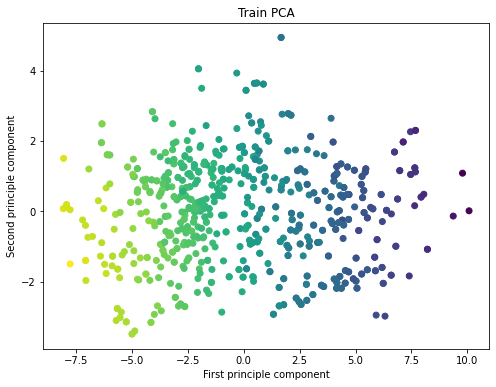

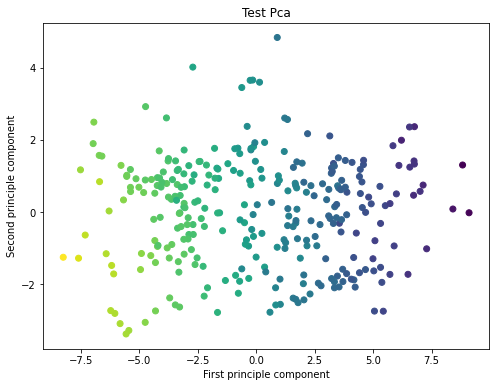

In [12]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(scaled_data)
train_pca=pca.transform(scaled_data)



plt.figure(figsize=(8,6))
plt.scatter(train_pca[:,0],train_pca[:,1],c=x_for_Ml['Energy'])
plt.title('Train PCA')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


pca2=PCA(n_components=5)
pca2.fit(test_scaled_data)
test_pca=pca2.transform(test_scaled_data)


test_scaled_data.shape

plt.figure(figsize=(8,6))
plt.scatter(test_pca[:,0],test_pca[:,1],c=testfeatures['Energy'])
plt.title('Test Pca')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# KERNEL PCA

Text(0, 0.5, 'Second principle component')

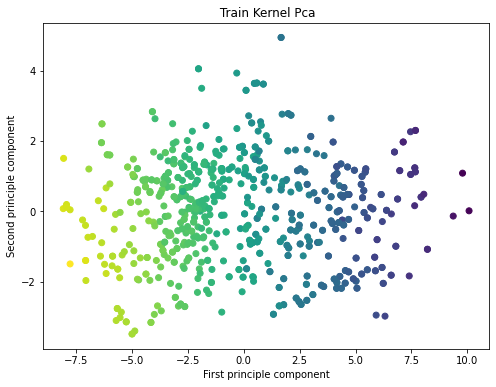

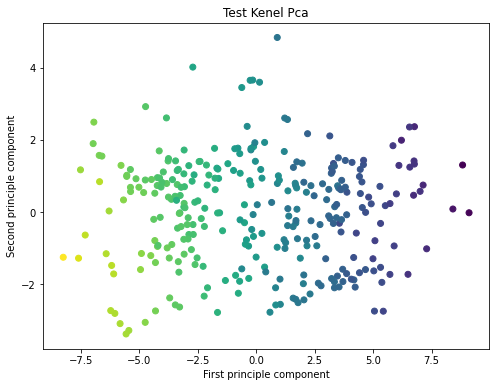

In [13]:
from sklearn.decomposition import KernelPCA
transformer= KernelPCA(n_components = 5 , kernel = 'linear')
train_kernelPca = transformer.fit(scaled_data)
train_kernelPca = transformer.transform(scaled_data)
train_kernelPca.shape


plt.figure(figsize=(8,6))
plt.scatter(train_kernelPca[:,0],train_kernelPca[:,1],c=x_for_Ml['Energy'])
plt.title(' Train Kernel Pca')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')


transformer= KernelPCA(n_components = 5 , kernel = 'linear')
test_kernelPca = transformer.fit(test_scaled_data)
test_kernelPca = transformer.transform(test_scaled_data)
test_kernelPca.shape


plt.figure(figsize=(8,6))
plt.scatter(test_kernelPca[:,0],test_kernelPca[:,1],c=testfeatures['Energy'])
plt.title('Test Kenel Pca')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# ANN

In [50]:
#x_for_Ml=x_for_Ml.to_numpy()
#test_for_RF = test_for_RF.to_numpy()


model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[5]))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dense(1000,activation="relu"))
model.add(keras.layers.Dense(700,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
#model.summary()
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


# Scaled dataset training
#history1=model.fit(scaled_data,y_train,epochs=100,validation_data=(test_scaled_data,y_test))


# PCA dataset training
#history1=model.fit(train_pca,y_train,epochs=100,validation_data=(test_pca,y_test))

# Kernel PCA dataset training
history1=model.fit(train_kernelPca,y_train,epochs=100,validation_data=(test_kernelPca,y_test))


#history.params

Train on 720 samples, validate on 300 samples
Epoch 1/100
720/720 [==============================] - 1s 1ms/sample - loss: 0.6914 - accuracy: 0.5167 - val_loss: 0.6850 - val_accuracy: 0.5600
Epoch 2/100
720/720 [==============================] - 0s 499us/sample - loss: 0.6839 - accuracy: 0.5486 - val_loss: 0.6788 - val_accuracy: 0.5533
Epoch 3/100
720/720 [==============================] - 0s 504us/sample - loss: 0.6794 - accuracy: 0.5611 - val_loss: 0.6740 - val_accuracy: 0.5633
Epoch 4/100
720/720 [==============================] - 0s 529us/sample - loss: 0.6757 - accuracy: 0.5764 - val_loss: 0.6704 - val_accuracy: 0.5733
Epoch 5/100
720/720 [==============================] - 0s 506us/sample - loss: 0.6733 - accuracy: 0.5736 - val_loss: 0.6675 - val_accuracy: 0.5800
Epoch 6/100
720/720 [==============================] - 0s 501us/sample - loss: 0.6705 - accuracy: 0.5847 - val_loss: 0.6652 - val_accuracy: 0.5767
Epoch 7/100
720/720 [==============================] - 0s 502us/sample - l

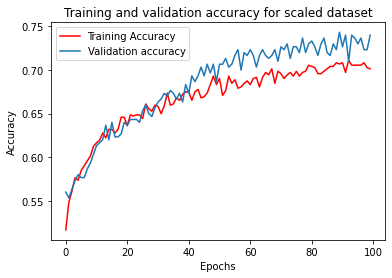

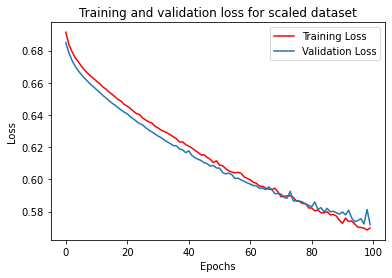

In [51]:
acc      = history1.history[     'accuracy' ]
val_acc  = history1.history[ 'val_accuracy' ]
loss     = history1.history[    'loss' ]
val_loss = history1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot  ( epochs,     acc ,'r', label= 'Training Accuracy')
plt.plot  ( epochs, val_acc, label='Validation accuracy' )
plt.title ('Training and validation accuracy for scaled dataset')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot  ( epochs,     loss ,'r', label= 'Training Loss' )
plt.plot  ( epochs, val_loss , label= 'Validation Loss')
plt.title ('Training and validation loss for scaled dataset'   )
plt.legend()


# SVM

In [65]:
from sklearn.svm import SVC



#classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel = SVC()

#Classifier for PCA
#classifier_svm_kernel.fit(scaled_data,y_train)

#Prediction for PCA
#pred=classifier_svm_kernel.predict(test_scaled_data)

#Classifier for Kernel PCA
classifier_svm_kernel.fit(train_pca,y_train)

#Prediction for Kernel PCA
pred=classifier_svm_kernel.predict(test_pca)


from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


cf = pd.DataFrame(confusion_matrix(y_test,pred),columns=['True','False'],index=['True','False'])
cf


print( 'Accuracy: %.2f' % (accuracy_score(y_test,pred) * 100),'%')


print(classification_report(y_test,pred))

Accuracy: 70.33 %
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       150
           1       0.68      0.76      0.72       150

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.71      0.70      0.70       300



Dataset for PCA
    
    Training data - train_pca
    Tranining label - y_train
    
    Test data - test_pca
    Test label - y_test
    
Dataset for Kernel PCA

     Training data - train_kernelPca
     Training label - y_train
     
     Test data - test_kernelPca
     Test label - y_test
    
    

# Logistic Regression

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


model = LogisticRegression(solver='liblinear', random_state=0).fit(train_pca,y_train)

#print( 'Accuracy: %.2f' % (accuracy_score(y_test,pred) * 100),'%')

print(classification_report(y_test, model.predict(test_pca)))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       150
           1       0.62      0.60      0.61       150

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



# KNN Regression

In [80]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(train_pca,y_train)

#Predict the response for test dataset
y_pred = knn.predict(test_pca)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7566666666666667


# Decision Treee

In [84]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy ca


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(train_kernelPca,y_train)

#Predict the response for test dataset
y_pred = clf.predict(test_kernelPca)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7533333333333333


# Bagging Decision Tree (Ensemble Learning I)

In [90]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(scaled_data,y_train)
# make a single prediction
#row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
yhat = model.predict(test_scaled_data)
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[113  37]
 [ 37 113]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.75      0.75      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

0.7533333333333333


# Boosting Decision Tree

In [93]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(train_kernelPca,y_train)
# make a single prediction
#row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
yhat = model.predict(test_kernelPca)
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[113  37]
 [ 37 113]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       150
           1       0.75      0.75      0.75       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

0.7533333333333333


# Naive Bayes

In [97]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(scaled_data,y_train)

#Predict Output
predicted= model.predict(test_scaled_data) # 0:Overcast, 2:Mild
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.5666666666666667


# Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(train_kernelPca,y_train)
y_pred = regressor.predict(test_kernelPca)



print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[123  27]
 [ 28 122]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       150
           1       0.82      0.81      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

0.8166666666666667


# Voting classification

In [104]:
from sklearn.ensemble import VotingClassifier

LogReg_clf = LogisticRegression()
DTree_clf = DecisionTreeClassifier()
SVC_clf = SVC()

LogReg_clf.fit(scaled_data,y_train)
DTree_clf.fit(scaled_data,y_train)
SVC_clf.fit(scaled_data,y_train)

LogReg_pred = LogReg_clf.predict(test_scaled_data)
DTree_pred = DTree_clf.predict(test_scaled_data)
SVC_pred = SVC_clf.predict(test_scaled_data)

averaged_preds = (LogReg_pred + DTree_pred + SVC_pred)//3
acc = accuracy_score(y_test, averaged_preds)
#print(acc)
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
voting_clf.fit(scaled_data,y_train)
preds = voting_clf.predict(test_scaled_data)
acc = accuracy_score(y_test, preds)
#l_loss = log_loss(y_test, preds)
#f1 = f1_score(y_test, preds)

print("Accuracy is: " + str(acc))
#print("Log Loss is: " + str(l_loss))
#print("F1 Score is: " + str(f1))

Accuracy is: 0.6966666666666667


In [76]:

Annscaled = 76
Annpca = 74.67
Annkpca = 74
accuracy_dataset['KernelPCA Dataset'] = Annkpca
accuracy = [[Annscaled,Annpca,Annkpca]]
accuracy_dataset = pd.DataFrame(accuracy ,columns = ['Scaled Dataset', 'PCA Dataset','KernelPCA Dataset'])
#accuracy_dataset = accuracy_dataset.append(accuracy_dataset)

accuracy_dataset.reset_index(drop=True)

,Scaled Dataset,PCA Dataset,KernelPCA Dataset
0,76,74.67,74


In [77]:
svmscaled = 70
svmpca = 70.33
svmkpca = 70.33
accuracy_dataset['Scaled Dataset'] = svmscaled
accuracy_dataset['PCA Dataset'] = svmpca
accuracy_dataset['KernelPCA Dataset'] = svmkpca
#accuracy = [[svmscaled,svmpca,svmkpca]]
#accuracy_dataset = pd.DataFrame(accuracy ,columns = ['Scaled Dataset', 'PCA Dataset','KernelPCA Dataset'])
accuracy_dataset = accuracy_dataset.append(accuracy_dataset)

accuracy_dataset.reset_index(drop=True)

,Scaled Dataset,PCA Dataset,KernelPCA Dataset
0,70,70.33,70.33
1,70,70.33,70.33


In [79]:
logscaled = 63
logpca = 62
logskpca = 62

In [81]:
knnscaled = 82
knnpca = 75.66
knnkpca = 75.66

In [85]:
treescaled = 62.66
treepca = 74.33
treekpca = 75.33

In [91]:
bagscaled = 75.33
bagpca = 75.33
bagkpca = 62.66

In [94]:
boostscaled = 62.66
boostpca = 75.33
boostkpca = 75.33

In [98]:
naivescaled = 56.66
naivepca = 62.33
naivekpca = 62.33

In [102]:
rndscaled = 67.66
rndpca = 81.66
rndkpca = 81.66

In [105]:
votscaled = 69.66
votpca = 71.66
votkpca = 72

In [109]:
data = {'Scaled dataset':[Annscaled,svmscaled,logscaled,knnscaled,treescaled,bagscaled,boostscaled,naivescaled,rndscaled,votscaled],
        'PCA Dataset':[Annpca,svmpca,logpca,knnpca,treepca,bagpca,boostpca,naivepca,rndpca,votpca],
        'KernelPCA Dataset':[Annkpca,svmkpca,logskpca,knnkpca,treekpca,bagkpca,boostkpca,naivekpca,rndkpca,votkpca]}
  
# Create DataFrame
#df = pd.DataFrame(data)
  
# Print the output.
df = pd.DataFrame(data, index =['ANN',
                                'SVM',
                                'Logistic Regression',
                                'KNN',
                                'Decision Tree',
                                'Bagging Decision Tree (Ensemble Learning I)',
                                'Boosting Decision Tree',
                                'Naive Bayes',
                                'Random Forest',
                                'Voting classification'])
df

,Scaled dataset,PCA Dataset,KernelPCA Dataset
ANN,76.00,74.67,74.00
SVM,70.00,70.33,70.33
Logistic Regression,63.00,62.00,62.00
KNN,82.00,75.66,75.66
Decision Tree,62.66,74.33,75.33
Bagging Decision Tree (Ensemble Learning I),75.33,75.33,62.66
Boosting Decision Tree,62.66,75.33,75.33
Naive Bayes,56.66,62.33,62.33
Random Forest,67.66,81.66,81.66
Voting classification,69.66,71.66,72.00


In [112]:
def highlight_max(s):
    '''
    highlight the maximum in a Series red.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]



In [113]:
df.style.apply(highlight_max)

,Scaled dataset,PCA Dataset,KernelPCA Dataset
ANN,76.000000,74.670000,74.000000
SVM,70.000000,70.330000,70.330000
Logistic Regression,63.000000,62.000000,62.000000
KNN,82.000000,75.660000,75.660000
Decision Tree,62.660000,74.330000,75.330000
Bagging Decision Tree (Ensemble Learning I),75.330000,75.330000,62.660000
Boosting Decision Tree,62.660000,75.330000,75.330000
Naive Bayes,56.660000,62.330000,62.330000
Random Forest,67.660000,81.660000,81.660000
Voting classification,69.660000,71.660000,72.000000
